# Face Recognition
This module works to detect faces using the 'detect_face.py' file and pre-trained models of facenet
https://github.com/davidsandberg/facenet <br><br>
Goals:
1. Load facenet and supporting modules without error
2. Load images & Prepare
3. Load pretrained weights to a network
4. Run face detection on a few test images

## 1. Imports

In [1]:
# Import face detection file & other facenet files
import sys
sys.path.append('../')
import facenet.src.align.detect_face as df

In [2]:
# Import supporting packages
%matplotlib inline
import numpy as np
import tensorflow as tf
import imageio
from matplotlib import pyplot as plt

## 2. Load Images & Prepare

In [3]:
# Filepaths for weight files
det_path = '../facenet/src/align/'
pnet_path = det_path + 'det1.npy'
rnet_path = det_path + 'det2.npy'
onet_path = det_path + 'det3.npy'

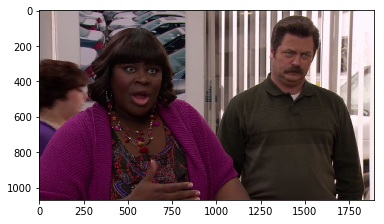

(1070, 1892, 3)


In [4]:
test_path = '../test_data/FaceDetect/WiderDataset'
test_img_orig = imageio.imread(test_path + '/4.jpg')
plt.imshow(test_img_orig)
plt.show()
test_img = test_img_orig
print(test_img.shape)

## 3. Loading Pretrained Face Detection Network

In [17]:
tf.reset_default_graph()
sess = tf.Session()

In [18]:
pnet, rnet, onet = df.create_mtcnn(sess, det_path)

In [21]:
# Not sure how to set these parameters
threshold = [0.5, 0.5, 0.5]
factor = 0.99    
minsize = 500
boxes, points = df.detect_face(test_img, minsize, pnet, rnet, onet, threshold, factor)

In [22]:
print(boxes)
print(points)

[]
[]


In [17]:
pnet_output = pnet(np.transpose(np.expand_dims(test_img, 0), (0,2,1,3)))

ValueError: could not broadcast input array from shape (941,530,4) into shape (1,941,530)

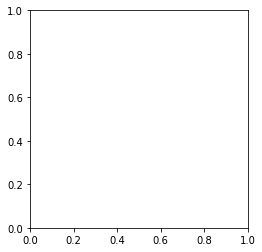

In [19]:
plt.imshow(pnet_output)